# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# loading data
df = pd.read_csv('dataforml.csv')
df.head()

# check for class imbalance
print(df['Reason'].value_counts())

# data processing
df = pd.get_dummies(df, columns=['Gender']) # convert categorical data to numerical

# split data into features and target
X = df.drop(columns=["Reason","Fileno"], axis=1)
Y = df["Reason"]

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

Unhealthy    432
Healthy       77
Name: Reason, dtype: int64


# Define Models

In [2]:
# define model
#model= LogisticRegression(max_iter=3000)
#model= DecisionTreeClassifier() 
model= GaussianNB()
#model = RandomForestClassifier()

# Define Pipeline 

Mean ROC AUC: 0.8206546360616128
Confusion Matrix:
[[12  2]
 [14 74]]
              precision    recall  f1-score   support

     Healthy       0.46      0.86      0.60        14
   Unhealthy       0.97      0.84      0.90        88

    accuracy                           0.84       102
   macro avg       0.72      0.85      0.75       102
weighted avg       0.90      0.84      0.86       102

Accuracy: 0.8431372549019608


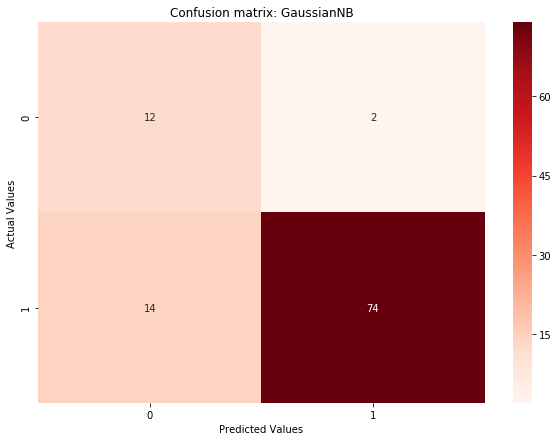

In [3]:
# define pipeline
steps = [('over', ADASYN()),('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline using cross-validation
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=10, n_jobs=-1)
mean_score = np.mean(scores)
print('Mean ROC AUC:', mean_score)

# fit model on training data and make predictions on test data
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# print metrics
print('Confusion Matrix:')
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print('Accuracy:', accuracy_score(Y_test, predictions))

# plot confusion matrix
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix: GaussianNB')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()